<a href="https://colab.research.google.com/github/chellick/Super_resolution/blob/main/CNN_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 #ignore
import tensorflow as tf
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [16]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [17]:
x_train_lr = torch.tensor(np.array(tf.image.resize(x_train, (x_train.shape[1] // 2, x_train.shape[2] // 2))), dtype=torch.float32)[:7000]
x_test_lr = torch.tensor(np.array(tf.image.resize(x_test, (x_test.shape[1] // 2, x_test.shape[2] // 2))), dtype=torch.float32)[:3000]

# Convert to float32 for x_train_hr and x_test_hr
x_train_hr = torch.tensor(x_train, dtype=torch.float32)[:7000]
x_test_hr = torch.tensor(x_test, dtype=torch.float32)[:3000]

x_train_lr = x_train_lr.permute(0, 3, 1, 2)
x_test_lr = x_test_lr.permute(0, 3, 1, 2)

x_train_hr = x_train_hr.permute(0, 3, 1, 2)
x_test_hr = x_test_hr.permute(0, 3, 1, 2)


train_dataset = TensorDataset(x_train_lr, x_train_hr)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [18]:
from torch.nn.modules.upsampling import Upsample
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3,3), padding="same"),
            nn.ReLU(),
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3,3), padding="same"),
            nn.ReLU(),

            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3,3), padding="same"),
            nn.Upsample(size=(32, 32), mode='bilinear'),
            nn.ReLU()
    )


  def forward(self, x):
    return self.layers(x)


In [19]:
model = CNN()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
model.parameters

<bound method Module.parameters of CNN(
  (layers): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): Upsample(size=(32, 32), mode='bilinear')
    (6): ReLU()
  )
)>

In [20]:
prediction = model(x_train_lr[:1])
prediction = prediction.permute(0, 2, 3, 1)
prediction.shape

torch.Size([1, 32, 32, 3])

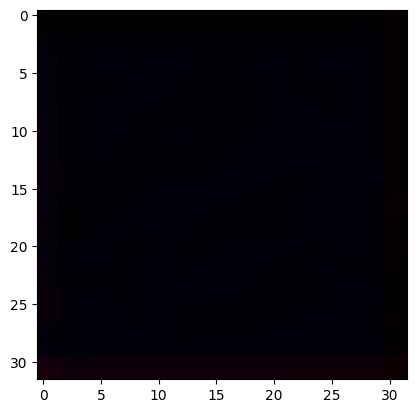

In [21]:
plt.imshow(prediction[0].detach().numpy())
plt.show()

In [25]:
for epoch in range(500):
    model.train()
    for batch_x, batch_y in train_loader:
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Loss {loss.item()} for {epoch} epoch")


Loss 0.12151173502206802 for 0 epoch
Loss 0.10569269210100174 for 1 epoch
Loss 0.11033163219690323 for 2 epoch
Loss 0.10482573509216309 for 3 epoch
Loss 0.10691872984170914 for 4 epoch
Loss 0.09995358437299728 for 5 epoch
Loss 0.09204302728176117 for 6 epoch
Loss 0.09464732557535172 for 7 epoch
Loss 0.08036640286445618 for 8 epoch
Loss 0.0752001628279686 for 9 epoch
Loss 0.0761583149433136 for 10 epoch
Loss 0.07651695609092712 for 11 epoch
Loss 0.07756180316209793 for 12 epoch
Loss 0.06840264797210693 for 13 epoch
Loss 0.06613954901695251 for 14 epoch
Loss 0.06837717443704605 for 15 epoch
Loss 0.06944374740123749 for 16 epoch
Loss 0.05973862111568451 for 17 epoch
Loss 0.06414811313152313 for 18 epoch
Loss 0.056307341903448105 for 19 epoch
Loss 0.06903869658708572 for 20 epoch
Loss 0.0569005087018013 for 21 epoch
Loss 0.06443426758050919 for 22 epoch
Loss 0.0628189668059349 for 23 epoch
Loss 0.059746935963630676 for 24 epoch
Loss 0.0600726418197155 for 25 epoch
Loss 0.05141308903694153 

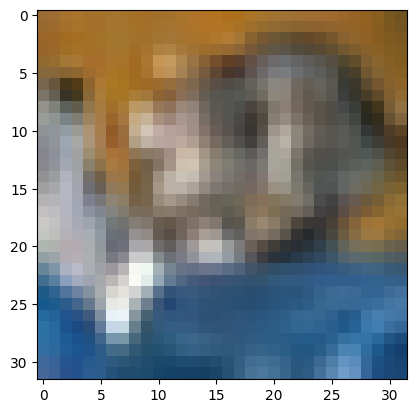

In [31]:
prediction = model(x_test_lr[:1])
prediction = prediction.permute(0, 2, 3, 1)

plt.imshow(prediction[0].detach().numpy())
plt.show()